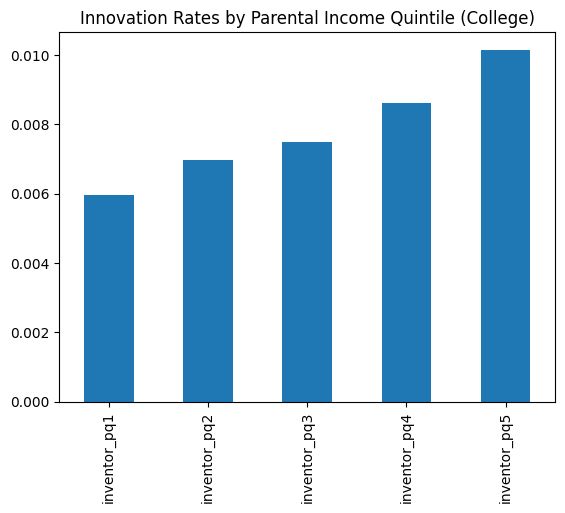

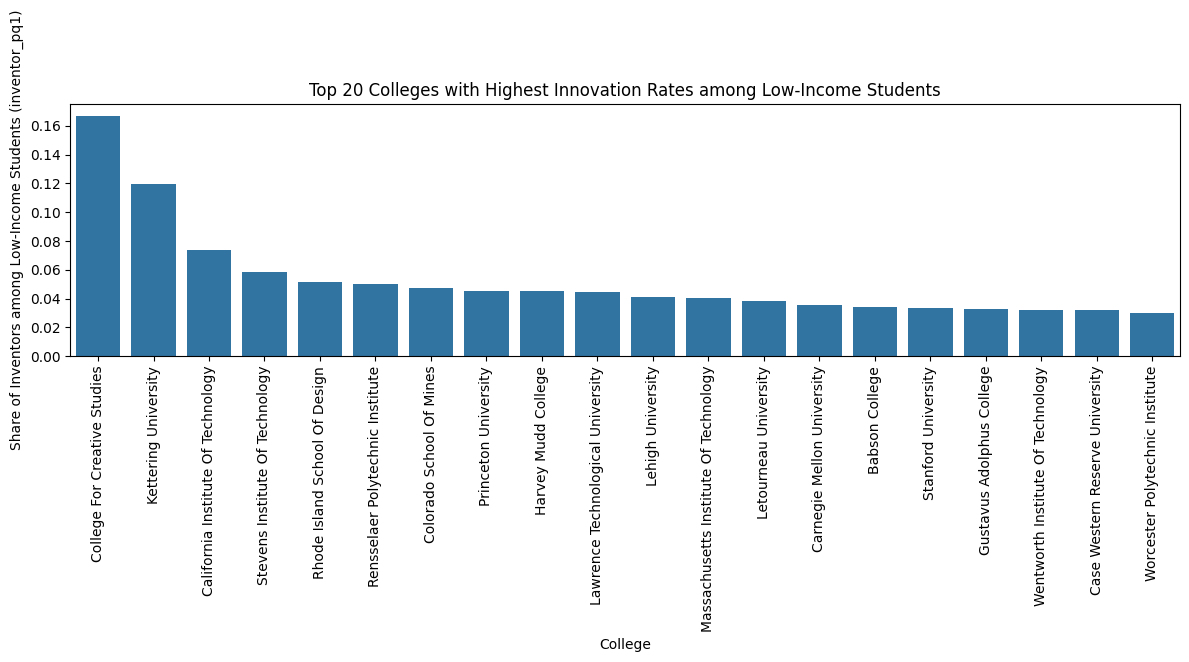

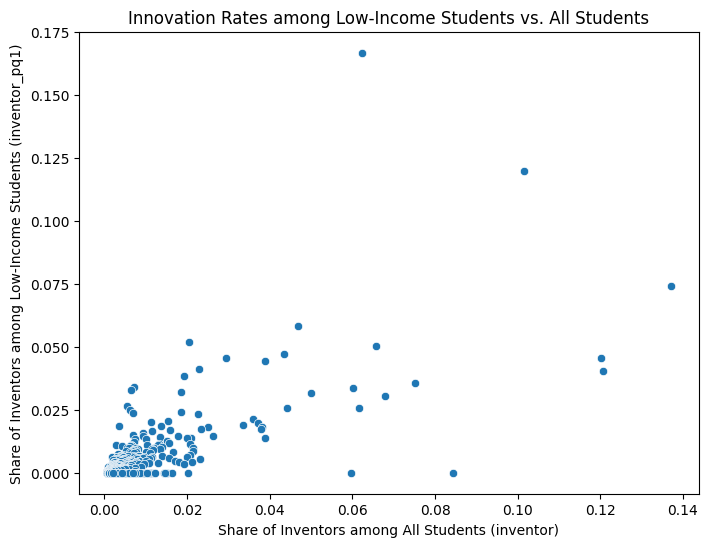

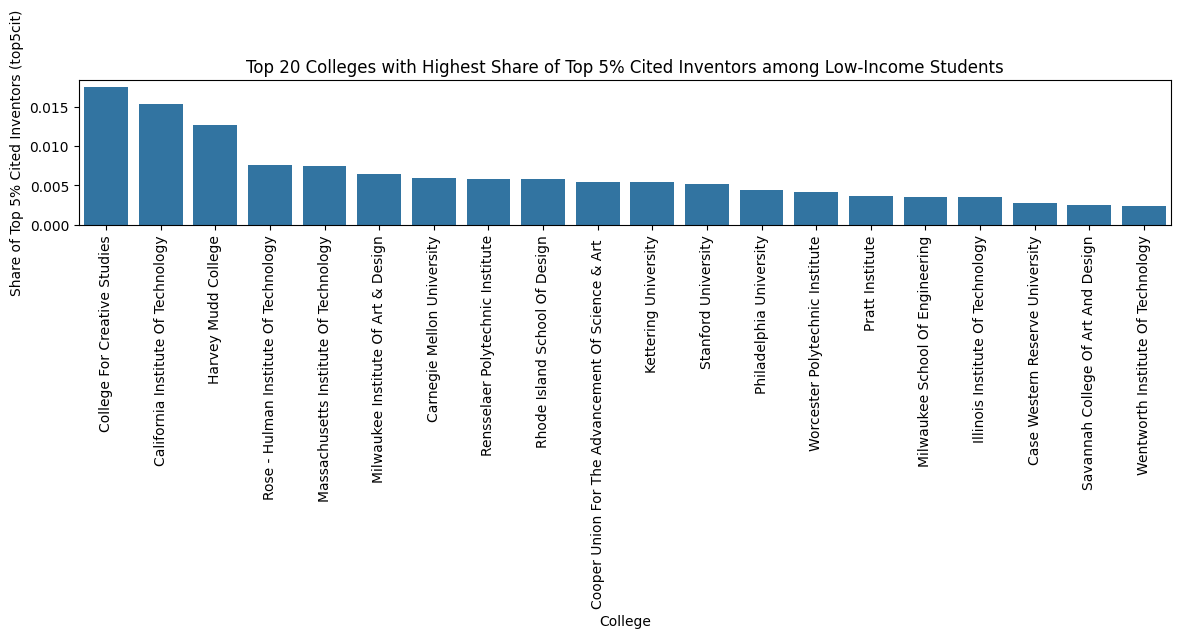

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load data tables
table1 = pd.read_csv('./code_and_data/data/excel/table_1a.csv')
table3 = pd.read_csv('./code_and_data/data/excel/table_3.csv') 
table4a = pd.read_csv('./code_and_data/data/excel/table_4a.csv')
table4b = pd.read_csv('./code_and_data/data/excel/table_4b.csv')

plt.figure()
table3[['inventor_pq1', 'inventor_pq2', 'inventor_pq3', 'inventor_pq4', 'inventor_pq5']].mean().plot.bar()
plt.title('Innovation Rates by Parental Income Quintile (College)')

# Sort colleges by the share of inventors among low-income students (inventor_pq_1)
table3 = table3.sort_values(by='inventor_pq1', ascending=False)

# Select top 20 colleges with the highest inventor_pq_1 value
top_colleges = table3.head(20)

# Bar chart: Top 20 colleges with highest inventor_pq_1
plt.figure(figsize=(12, 6))
sns.barplot(x='instnm', y='inventor_pq1', data=top_colleges)
plt.xticks(rotation=90)
plt.title('Top 20 Colleges with Highest Innovation Rates among Low-Income Students')
plt.xlabel('College')
plt.ylabel('Share of Inventors among Low-Income Students (inventor_pq1)')
plt.tight_layout()
plt.show()

# Scatter plot: inventor_pq_1 vs. inventor
plt.figure(figsize=(8, 6))
sns.scatterplot(x='inventor', y='inventor_pq1', data=table3)
plt.title('Innovation Rates among Low-Income Students vs. All Students')
plt.xlabel('Share of Inventors among All Students (inventor)')
plt.ylabel('Share of Inventors among Low-Income Students (inventor_pq1)')
plt.show()

# Bar chart: Top 20 colleges with highest top5cit for low-income students
top_colleges_top5cit = table3.sort_values(by='top5cit', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='instnm', y='top5cit', data=top_colleges_top5cit)
plt.xticks(rotation=90)
plt.title('Top 20 Colleges with Highest Share of Top 5% Cited Inventors among Low-Income Students')
plt.xlabel('College')
plt.ylabel('Share of Top 5% Cited Inventors (top5cit)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load data tables
table1 = pd.read_csv('./code_and_data/data/excel/table_1a.csv')
table3 = pd.read_csv('./code_and_data/data/excel/table_3.csv') 
table4a = pd.read_csv('./code_and_data/data/excel/table_4a.csv')
table4b = pd.read_csv('./code_and_data/data/excel/table_4b.csv')

plt.figure()
table3[['inventor_pq1', 'inventor_pq2', 'inventor_pq3', 'inventor_pq4', 'inventor_pq5']].mean().plot.bar()
plt.title('Innovation Rates by Parental Income Quintile (College)')
plt.show()

# Sort colleges by the share of inventors among low-income students (inventor_pq_1)
table3 = table3.sort_values(by='inventor_pq1', ascending=False)

# Select top 20 colleges with the highest inventor_pq_1 value
top_colleges = table3.head(20)

# Bar chart: Top 20 colleges with highest inventor_pq_1
plt.figure(figsize=(12, 6))
sns.barplot(x='instnm', y='inventor_pq1', data=top_colleges)
plt.xticks(rotation=90)
plt.title('Top 20 Colleges with Highest Innovation Rates among Low-Income Students')
plt.xlabel('College')
plt.ylabel('Share of Inventors among Low-Income Students (inventor_pq1)')
plt.tight_layout()
plt.show()

# Scatter plot: inventor_pq_1 vs. inventor with linear regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='inventor', y='inventor_pq1', data=table3)
plt.title('Innovation Rates among Low-Income Students vs. All Students')
plt.xlabel('Share of Inventors among All Students (inventor)')
plt.ylabel('Share of Inventors among Low-Income Students (inventor_pq1)')
plt.show()

# Perform linear regression
X = table3['inventor'].values.reshape(-1, 1)
y = table3['inventor_pq1'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)
print(f"Linear Regression Results:")
print(f"Coefficient: {reg.coef_[0][0]:.3f}")
print(f"Intercept: {reg.intercept_[0]:.3f}")
print(f"R-squared: {reg.score(X, y):.3f}")

# Bar chart: Top 20 colleges with highest top5cit for low-income students
top_colleges_top5cit = table3.sort_values(by='top5cit', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='instnm', y='top5cit', data=top_colleges_top5cit)
plt.xticks(rotation=90)
plt.title('Top 20 Colleges with Highest Share of Top 5% Cited Inventors among Low-Income Students')
plt.xlabel('College')
plt.ylabel('Share of Top 5% Cited Inventors (top5cit)')
plt.tight_layout()
plt.show()

# Scatter plot: inventor_pq1 vs. par_ed with linear regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='par_ed', y='inventor_pq1', data=table3)
plt.title('Innovation Rates among Low-Income Students vs. Parental Education')
plt.xlabel('Parental Education Level (par_ed)')
plt.ylabel('Share of Inventors among Low-Income Students (inventor_pq1)')
plt.show()